In [19]:
import numpy as np
from decision_tree import calculate_information_gain, decision_tree_train, decision_tree_predict
from naive_bayes import naive_bayes_train, naive_bayes_predict
from load_all_data import load_all_data
from sklearn.metrics import confusion_matrix
from crossval import cross_validate
import random
import matplotlib.pyplot as plt

d = 5000 # Maximum number of features

In [20]:
train_data, test_data, train_labels, test_labels = load_all_data()

train_data = train_data.T
test_data = test_data.T

train_data = np.where(train_data > 128, 1, 0)

In [21]:
#Iterate through train_labels and sum up the number of times each label appears
classes, class_num = np.unique(train_labels, return_counts = True)
print("Number of classes: ", len(classes))
print("Number of instances per class: ", class_num)

Number of classes:  10
Number of instances per class:  [3732 4238 3747 3981 3683 3416 3724 3992 3680 3807]


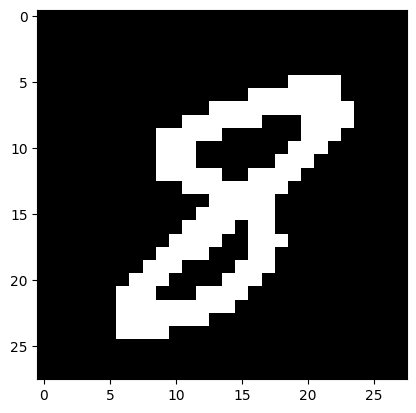

In [22]:
#visualising our dataset using matplotlib
image0 = train_data[:, 0]
#Reshape to 28x28
image0 = np.reshape(image0, (28,28))
plt.imshow(image0, cmap='gray')

In [23]:
#print the shape of train_data and test_data, and the shape of train_labels and test_labels
print(train_data.shape)
print(test_data.shape)
print('------')
print(train_labels.shape)
print(test_labels.shape)


(784, 38000)
(784, 4000)
------
(38000,)
(4000,)


In [24]:
# Filter features by information gain

gain = calculate_information_gain(train_data, train_labels)

print(gain)

# sort features by calculated information gain
ranks = gain.argsort()[::-1]

train_data = train_data[ranks[:d], :]
test_data = test_data[ranks[:d], :]

# randomly shuffle data
num_training = train_data.shape[1] #Get the number of rows

order = list(range(num_training))
random.shuffle(order)

# train_data = train_data[:, order]
# train_labels = train_labels[order]

[3.42198492e-13 3.42198492e-13 3.42198492e-13 3.42198492e-13
 3.42198492e-13 3.42198492e-13 3.42198492e-13 3.42198492e-13
 3.42198492e-13 3.42198492e-13 3.42198492e-13 3.42198492e-13
 3.42198492e-13 8.56141891e-05 6.09671299e-05 3.42198492e-13
 3.42198492e-13 3.42198492e-13 3.42198492e-13 3.42198492e-13
 3.42198492e-13 3.42198492e-13 3.42198492e-13 3.42198492e-13
 3.42198492e-13 3.42198492e-13 3.42198492e-13 3.42198492e-13
 3.42198492e-13 3.42198492e-13 3.42198492e-13 3.42198492e-13
 3.42198492e-13 3.42198492e-13 1.22264740e-04 2.44554991e-04
 3.70416704e-04 5.25805075e-04 1.05916096e-03 1.53014666e-03
 1.65273138e-03 1.60015004e-03 1.46671485e-03 1.29226195e-03
 1.18915900e-03 1.29902140e-03 9.17608058e-04 5.50392329e-04
 4.28038234e-04 6.11291821e-05 1.22264740e-04 6.11291821e-05
 3.42198492e-13 3.42198492e-13 3.42198492e-13 3.42198492e-13
 3.42198492e-13 3.42198492e-13 3.42198492e-13 3.42198492e-13
 6.11291821e-05 3.42198492e-13 3.99025335e-04 9.34357838e-04
 1.90832486e-03 3.571666

In [25]:
# prune data to even smaller (since decision tree takes much longer to train)

d = 784

train_data_small = train_data[:d, :]
test_data_small = test_data[:d, :]

# Apply cross-validation on training data to select hyper-parameter (max depth) of decision trees
depth_values = np.array([2, 4, 8, 16, 32, 64, 128])

cv_score = np.zeros(depth_values.size)

params = dict()

for i in range(depth_values.size):
    params['max_depth'] = depth_values[i]
    cv_score[i], _ = cross_validate(decision_tree_train, decision_tree_predict, 
                                 train_data_small, train_labels, 3, params)

Text(0.5, 1.0, 'Decision Tree Cross-Validation Accuracy')

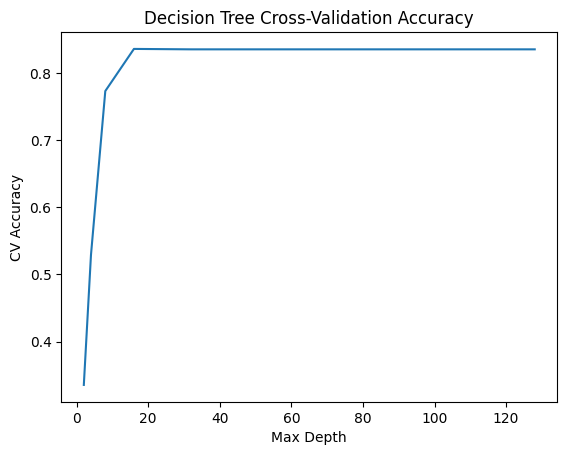

In [26]:
plt.plot(depth_values, cv_score)
plt.xlabel('Max Depth')
plt.ylabel('CV Accuracy')
plt.title('Decision Tree Cross-Validation Accuracy')

In [27]:
# Try naive Bayes 
d = 10000 # Maximum number of features
nb_params = {}
nb_model = naive_bayes_train(train_data, train_labels, nb_params)


# Compute training accuracy
nb_train_predictions = naive_bayes_predict(train_data, nb_model)
nb_train_accuracy = np.mean(nb_train_predictions == train_labels)
print("Naive Bayes training accuracy: %f" % nb_train_accuracy)


# Compute testing accuracy
nb_test_predictions = naive_bayes_predict(test_data, nb_model)
nb_test_accuracy = np.mean(nb_test_predictions == test_labels)
print("Naive Bayes testing accuracy: %f" % nb_test_accuracy)

Naive Bayes training accuracy: 0.778395
Naive Bayes testing accuracy: 0.689750


[392   0   0   0   0   0   0   0   8   0   0 155   3   1   0   0   3   0
 284   0  18   0 357   7   1   0  16   0  30   1  17   0  13 287   0   1
   3   0  45   4  14   0   7   1 214   0  14   0  92  47  48   0   5  44
   0  85   6   0 184   7  24   0   6   0   0   4 363   0  16   0  18   0
   6   4   4   0   2 274  71  30   8   0   2  11   0   0   2   0 358   2
  14   0   2   3   9   0   1   2  76 274]


NameError: name 'tn_fp' is not defined

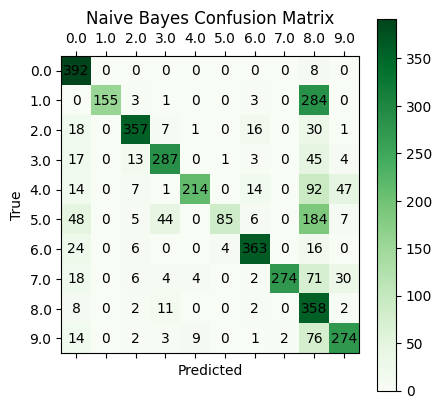

In [51]:
# Create the confusion matrix
cm = confusion_matrix(test_labels, nb_test_predictions)

# Plot the confusion matrix
plt.matshow(cm, cmap='Greens')
plt.colorbar()

# Add labels to the plot
tick_marks = np.arange(len(set(test_labels)))
plt.xticks(tick_marks, sorted(set(test_labels)))
plt.yticks(tick_marks, sorted(set(test_labels)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Naive Bayes Confusion Matrix')

# Add values to the plot
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center')

plt.show()


In [50]:
cm = confusion_matrix(test_labels, nb_test_predictions)
#We have 10 features so we will have 10 precision, recall and f1 scores that we have to average
precision = np.zeros(cm.shape[0])
recall = np.zeros(cm.shape[0])
f1_score = np.zeros(cm.shape[0])

for i in range(cm.shape[0]):
    tp = cm[i, i]
    fp = np.sum(cm[:, i]) - tp
    fn = np.sum(cm[i, :]) - tp
    
    precision[i] = tp / (tp + fp)
    recall[i] = tp / (tp + fn)
    f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])

avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
avg_f1_score = np.mean(f1_score)

print("Average Naive Bayes Precision: ", round(avg_precision * 100, 2), "%")
print("Average Naive Bayes Recall: ", round(avg_recall * 100,2), "%")
print("Average Naive Bayes F1 Score: ", round(avg_f1_score * 100,2), "%")


Average Naive Bayes Precision:  82.2 %
Average Naive Bayes Recall:  69.11 %
Average Naive Bayes F1 Score:  69.22 %


In [ ]:
# Train on full training data with best depth

best_depth_index = cv_score.argmax()

params['max_depth'] = depth_values[best_depth_index]

dt_model = decision_tree_train(train_data, train_labels, params)

Decision tree training accuracy: 0.990658
Decision tree testing accuracy: 0.827500


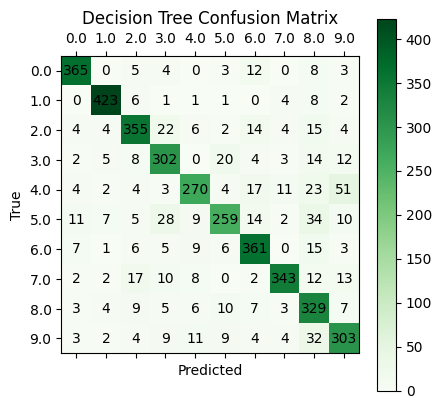

In [ ]:
# Compute testing accuracy

dt_predictions = decision_tree_predict(test_data, dt_model)

dt_accuracy = np.mean(dt_predictions == test_labels)


dt_train_predictions = decision_tree_predict(train_data, dt_model)
dt_train_accuracy = np.mean(dt_train_predictions == train_labels)

print("Decision tree training accuracy: %f" % dt_train_accuracy)
print("Decision tree testing accuracy: %f" % dt_accuracy)

#Create the confusion matrix
cm = confusion_matrix(test_labels, dt_predictions)

#Plot the confusion matrix
# Plot the confusion matrix
plt.matshow(cm, cmap='Greens')
plt.colorbar()

# Add labels to the plot
tick_marks = np.arange(len(set(test_labels)))
plt.xticks(tick_marks, sorted(set(test_labels)))
plt.yticks(tick_marks, sorted(set(test_labels)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Decision Tree Confusion Matrix')

# Add values to the plot
for i in range(len(cm)):
    for j in range(len(cm)):
        plt.text(j, i, str(cm[i][j]), ha='center', va='center')

In [49]:
dt = confusion_matrix(test_labels, dt_predictions)
#We have 10 features so we will have 10 precision, recall and f1 scores that we have to average
precision = np.zeros(cm.shape[0])
recall = np.zeros(cm.shape[0])
f1_score = np.zeros(cm.shape[0])

for i in range(cm.shape[0]):
    tp = cm[i, i]
    fp = np.sum(cm[:, i]) - tp
    fn = np.sum(cm[i, :]) - tp
    
    precision[i] = tp / (tp + fp)
    recall[i] = tp / (tp + fn)
    f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])

avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
avg_f1_score = np.mean(f1_score)

print("Average Naive Bayes Precision: ", round(avg_precision * 100, 2), "%")
print("Average Naive Bayes Recall: ", round(avg_recall * 100,2), "%")
print("Average Naive Bayes F1 Score: ", round(avg_f1_score * 100,2), "%")


Average Naive Bayes Precision:  82.2
Average Naive Bayes Recall:  69.11
Average Naive Bayes F1 Score:  69.22


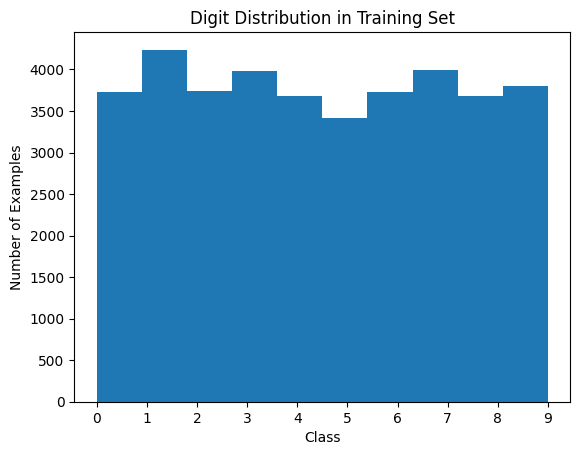

In [ ]:
plt.hist(train_labels)
plt.xlabel('Class')
plt.title('Digit Distribution in Training Set')
plt.ylabel('Number of Examples')
#Change the x axis to have a tick for every digit from 1-9
plt.xticks(np.arange(0, 10, 1))
#Add a grid
# plt.grid(True)
plt.show()

## MLP
Not working, so we did not run for the final run

In [ ]:
from mlp import mlp_train, mlp_predict, logistic, nll
#from kernelsvm import kernel_svm_train, kernel_svm_predict
from scipy.io import loadmat
from plotutils import plot_data, plot_surface
import copy

In [ ]:
testing_train_labels = train_labels
testing_test_labels = test_labels
testing_train_data = train_data
testing_test_data = test_data
print(testing_train_data.shape)

In [ ]:
num_models = 5
num_folds = 4
test_accuracy = np.zeros((len(testing_train_labels), num_models))

In [ ]:
# run multi-layer perceptron with cross-validation to select model parameters and structure on all datasets
# this will take a few minutes



structures = [[1], [4], [2, 2], [2, 4], [4, 4]]
lambda_vals = [0.01, 0.1, 1]
    
params = {
        'max_iter': 400,
        'activation_function': logistic,
        'loss_function': nll,
        'num_hidden_units': [32,32],
        'lambda': 0.1
}
    
best_params = params
best_score = 0
    
    
                
mlp_model = mlp_train(testing_train_data, testing_train_labels, best_params)
predictions, _, _, _ = mlp_predict(testing_test_data, mlp_model)
test_accuracy = np.mean(predictions == test_labels)
    
print("MLP had test accuracy %f on Dataset " % (test_accuracy))
print("with structure %s and lambda = %f" % (repr(best_params['num_hidden_units']), best_params['lambda']))
    
# plt.figure()
# plot_surface(mlp_predict, mlp_model, testing_train_data)
# plot_data(testing_train_data, testing_train_labels)
# plt.title('MLP on Dataset %d')
# plt.show()

## SVM (Support Vector Machine)